In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
languages = ['python', 'julia', 'c', 'c-otimizado', 'r','java']

## VM

In [16]:
frames = []
for lang in languages:
    tmp = pd.read_csv(f'./vm/results-vm-{lang}.csv')
    tmp.insert(0, 'language', lang)
    frames.append(tmp)
df = pd.concat(frames, ignore_index=True)
df = df.astype({'avg time': float, 'min time': float, 'max time': float, 'std dev': float})

In [17]:
tmp = df['function name'].str.rsplit('_', n=1, expand=True)
df['function name'] = tmp[0]
df.insert(2, 'instance', tmp[1])

In [18]:
df

,language,function name,instance,avg time,min time,max time,std dev
0,python,copy_matrix,5000,0.462544,0.451025,0.483602,0.018264
1,python,copy_matrix,7000,0.879434,0.876665,0.882130,0.002733
2,python,copy_matrix,9000,9.393826,1.446785,25.279601,13.757485
3,python,look_and_say_sequence,40,1.174409,0.924105,1.466982,0.273896
4,python,look_and_say_sequence,45,17.571527,15.260871,21.577761,3.483104
...,...,...,...,...,...,...,...
206,java,evaluate_functions,80000,297.143667,295.281000,298.629000,1.705597
207,java,evaluate_functions,90000,332.028333,331.685000,332.270000,0.305464
208,java,evaluate_functions,100000,368.135000,367.729000,368.565000,0.418516
209,java,find_pernicious_numbers,100000,0.013000,0.010000,0.015000,0.002646


/tmp/ipykernel_6132/977977724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['final'] = df_test['language'] + ' - ' + df_test['instance']
/tmp/ipykernel_6132/977977724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['final'] = df_test['language'] + ' - ' + df_test['instance']
/tmp/ipykernel_6132/977977724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

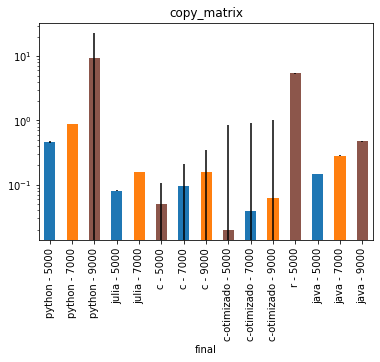

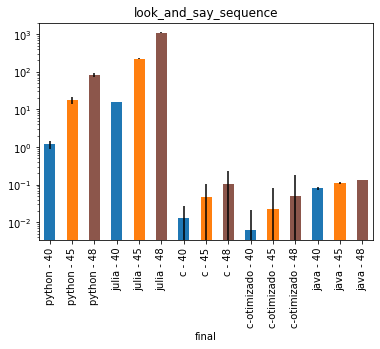

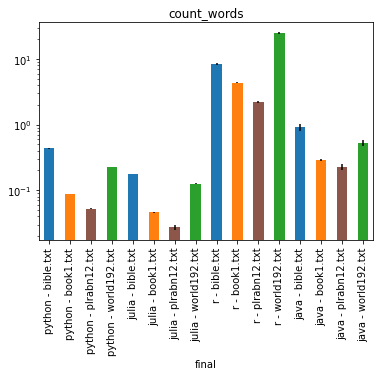

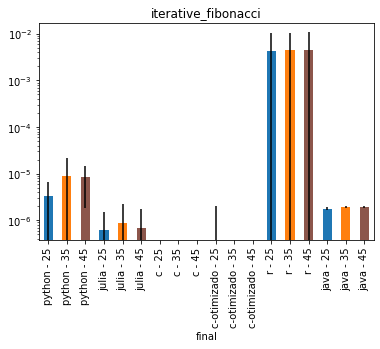

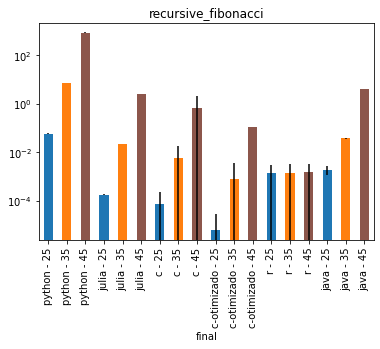

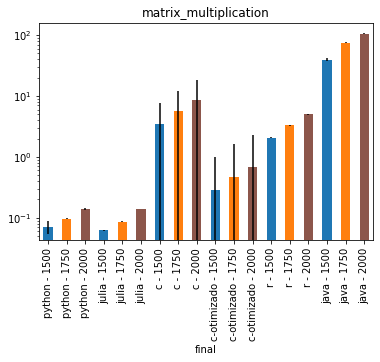

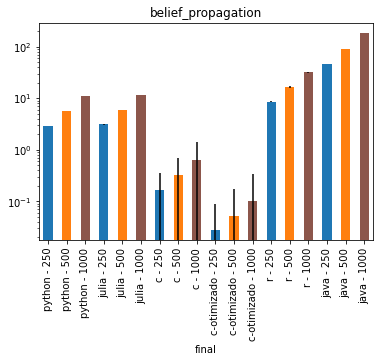

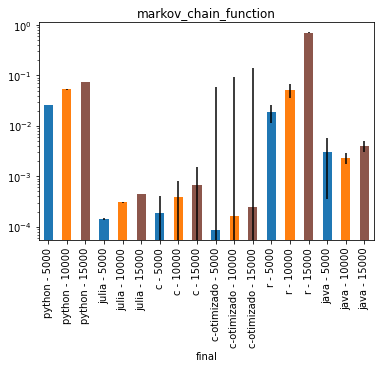

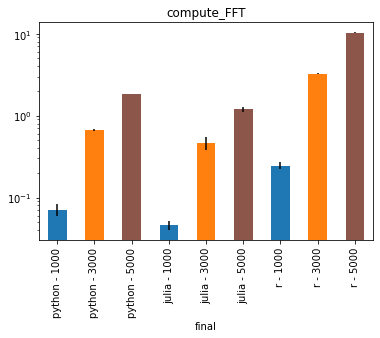

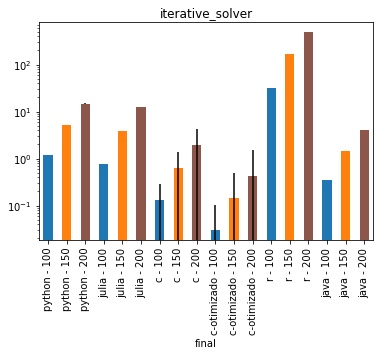

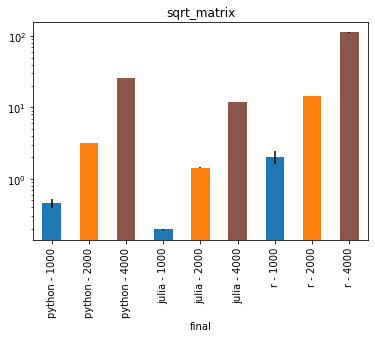

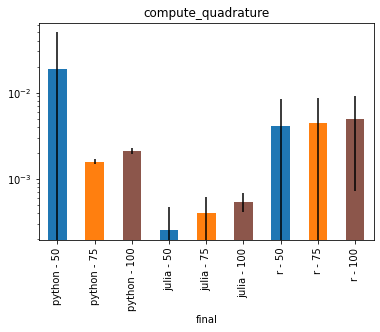

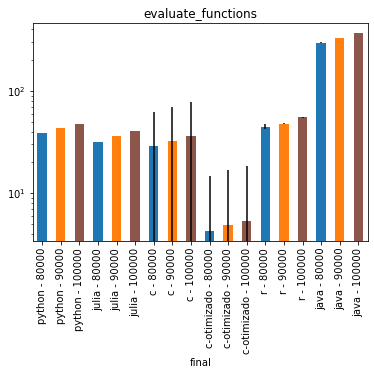

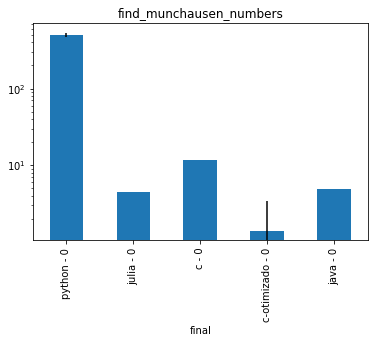

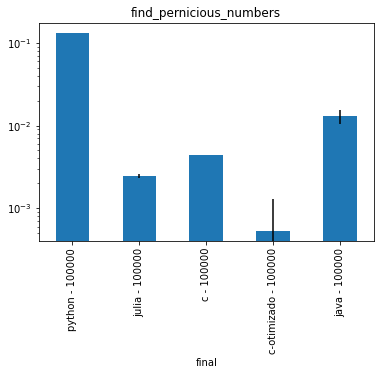

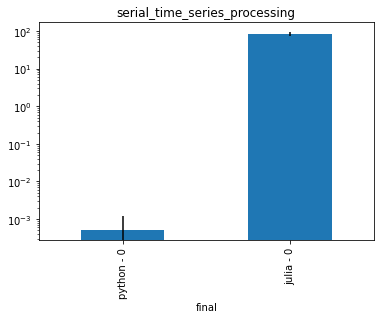

In [19]:
pallet = ['#1f77b4', '#ff7f0f', '#8c564b', '#2ca02c']
for func in df['function name'].unique():
    df_test = df.groupby('function name').get_group(func)
    lim = len(df_test['instance'].unique())
    df_test['final'] = df_test['language'] + ' - ' + df_test['instance'] 
    ax = df_test.plot(logy=True, title=func, legend=False, kind='bar', 
                 x='final', y='avg time', yerr='std dev', 
                 color=pallet[:lim]);
    ax.get_figure().savefig(f'./img_vm/{func}.png')
    